In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Print the table names and columns in dictionary format
Measurement.__dict__

mappingproxy({'__table__': Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 1cf7b9f8b30>,
              '__init__': <function sqlalchemy.orm.instrumentation.__init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1cf7b23f130>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1cf7b2861d0>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1cf7b286130>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1cf7b286090>,
       

In [10]:
Station.__dict__

mappingproxy({'__table__': Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.station'> at 1cf7ca35e50>,
              '__init__': <function sqlalchemy.orm.instrumentation.__init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1cf79ba7db0>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1cf79ba7c70>,
              'name': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1cf79ba7bd0>,
              'latitude': <sqlalchemy.orm.attributes.InstrumentedAttr

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [12]:
# Calculate the date one year from the last date in data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>='2016-08-23').filter(Measurement.date<='2017-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns = ['date', 'precipitation'])
df = df.set_index('date')

# Sort the dataframe by date
df = df.sort_index()

# Drop rows without values to fix error
df = df.dropna()

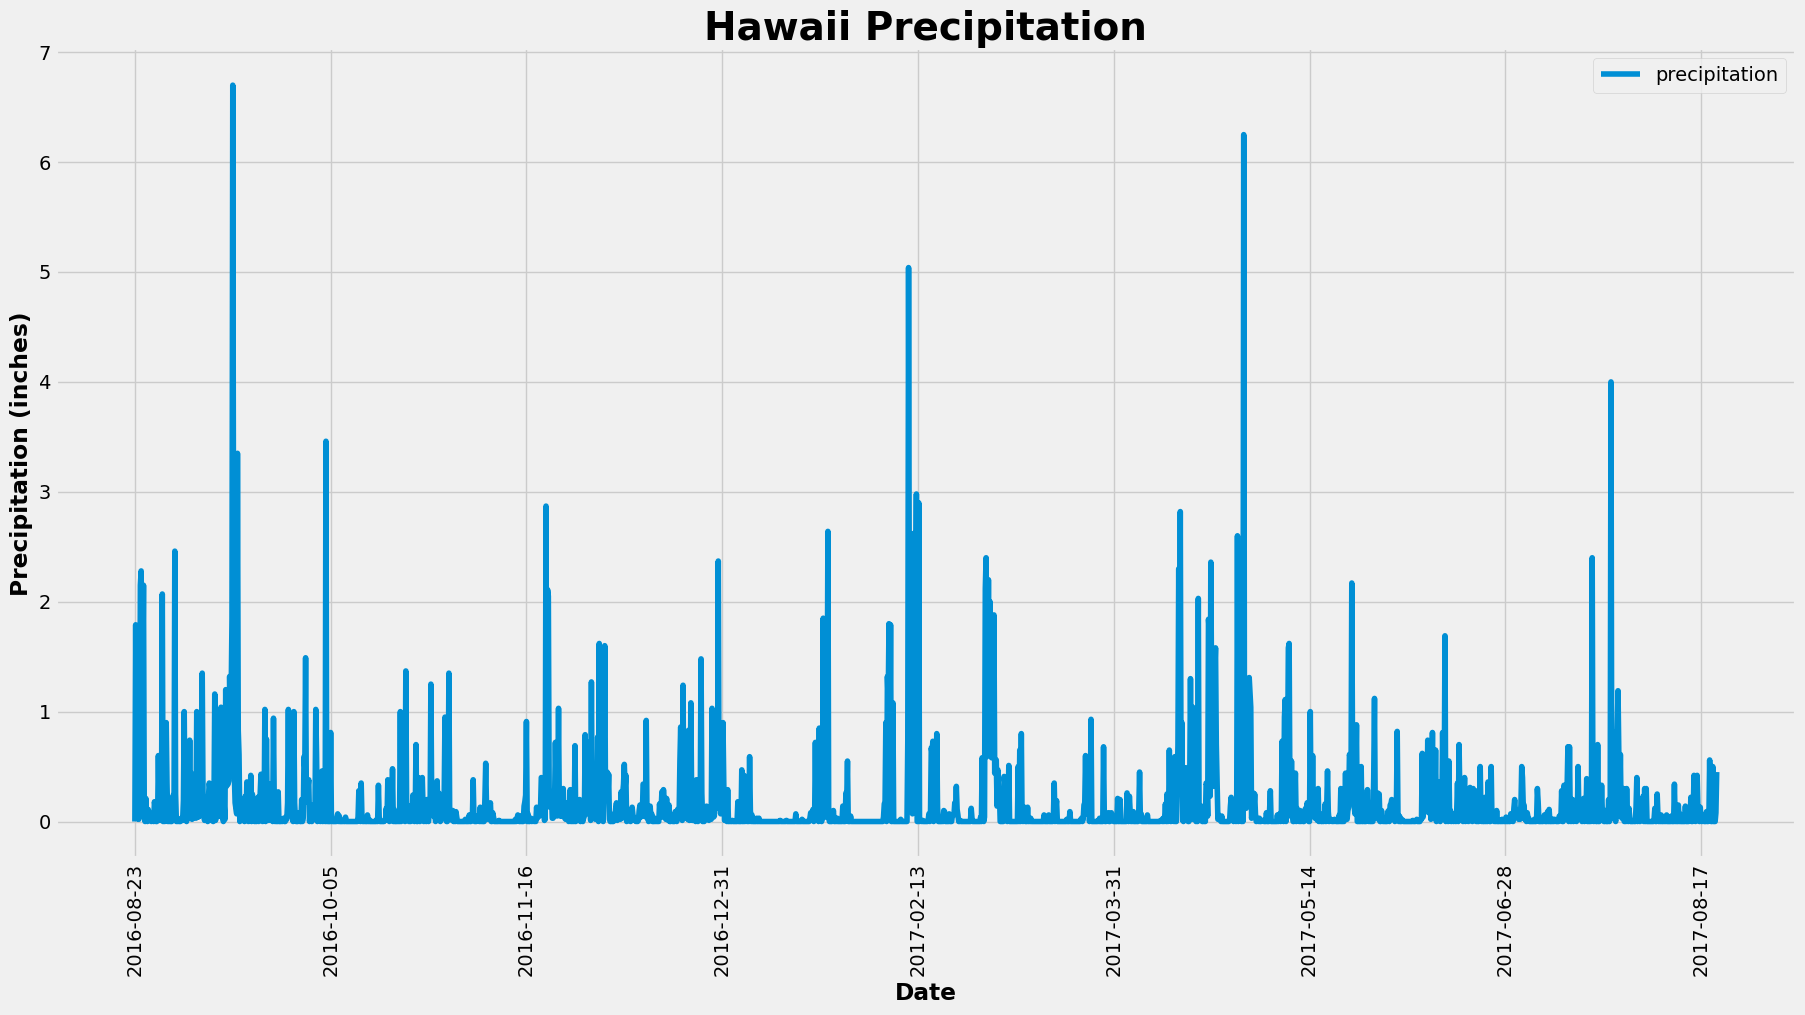

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(20,10))
plt.title('Hawaii Precipitation', weight = 'bold', fontsize = 28)
plt.ylabel('Precipitation (inches)', weight = 'bold')
plt.xlabel('Date', weight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).distinct().count()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station))\
            .group_by(Measurement.station)\
            .order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
active_min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
active_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

In [19]:
# Using the most active station id, query the last 12 months of temperature observation data for this station
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>='2016-08-23').filter(Measurement.date<='2017-08-23').filter(Measurement.station == "USC00519281").all()

In [20]:
# Save the query results as a Pandas DataFrame
df2 = pd.DataFrame(results)

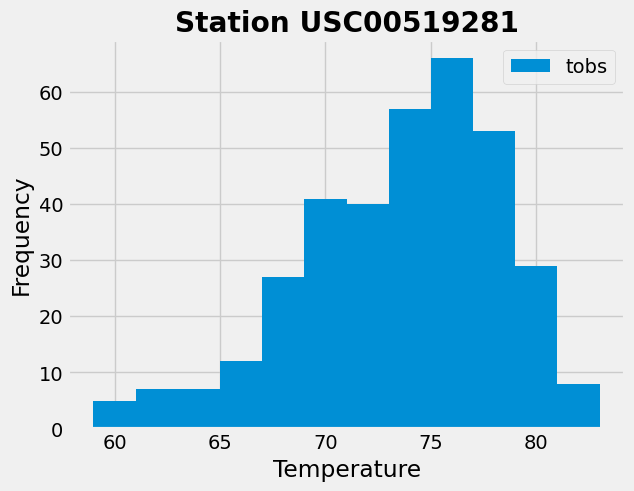

In [21]:
# Plot the results as a histogram
ax = df2.plot.hist(bins = 12)
ax.set_title('Station USC00519281', weight = 'bold')
ax.set_xlabel('Temperature')
plt.show()

# Close session

In [22]:
# Close Session
session.close()